In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


independant and dependant features

In [3]:
X= df.iloc[:,:-1]
y = df.iloc[:,-1]

Split data into train and test

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3


Defining and train model

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 2.25\ngini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[3] <= 1.25\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[3] <= 1.65\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.5833

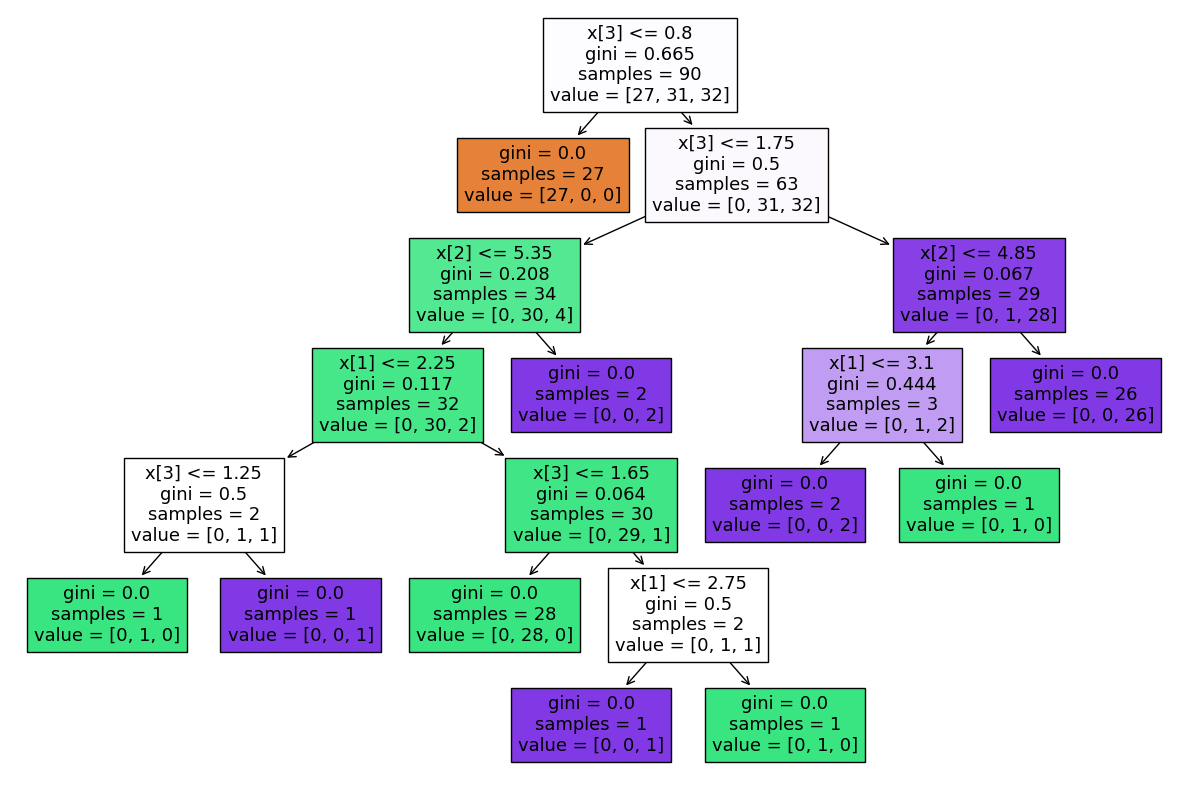

In [32]:
# Drawing tree
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

Predictions

In [33]:
predictions = model.predict(X_test)
predictions

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor'], dtype=object)

In [34]:
# Calculate the accuracy score
report = classification_report(y_test,predictions)
report

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        23\n  versicolor       0.95      0.95      0.95        19\n   virginica       0.94      0.94      0.94        18\n\n    accuracy                           0.97        60\n   macro avg       0.96      0.96      0.96        60\nweighted avg       0.97      0.97      0.97        60\n'

we Acheived 97% accuracy but there might be a chances of overfitting so lets do hyper parameter tunning

In [38]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,]
}

new_model = GridSearchCV(model,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

new_model.fit(X_train,y_train)

new_model.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

so as you can see we got best parameters so lets train model with this parameters and test it

Using the max_depth = 1 results are not impressive so lets make it 4 and test it.

In [47]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.4444444444444444, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 1.65\ngini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7777777777777778, 0.1, 

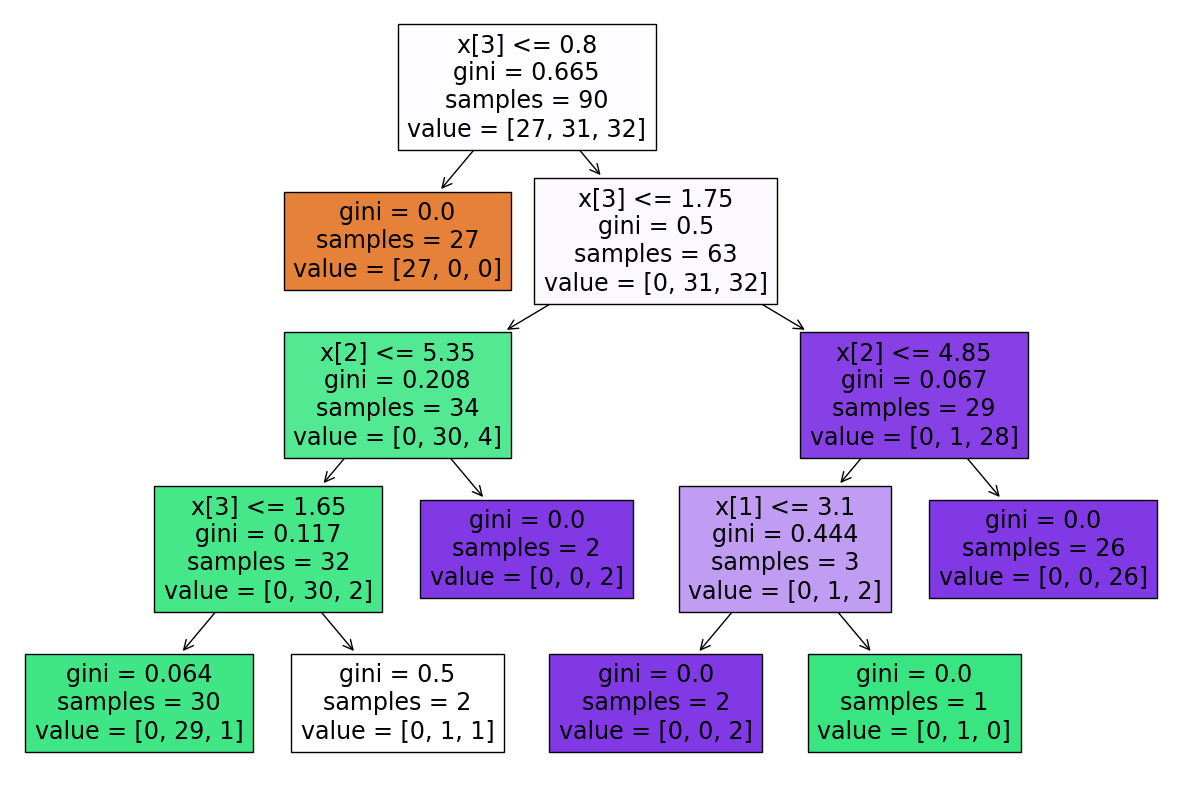

In [48]:
# Drawing tree
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
tree.plot_tree(DT,filled=True)

In [49]:
new_preds = DT.predict(X_test)
new_preds

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor'], dtype=object)

In [50]:
report_2 = classification_report(new_preds,y_test)
report_2

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        23\n  versicolor       1.00      0.95      0.97        20\n   virginica       0.94      1.00      0.97        17\n\n    accuracy                           0.98        60\n   macro avg       0.98      0.98      0.98        60\nweighted avg       0.98      0.98      0.98        60\n'

So we can say that now we have fine tunned model here.